# Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


# Data Visualization

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
cm = sns.light_palette("green", as_cmap=True)
data.head(5).style.background_gradient(cmap=cm)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


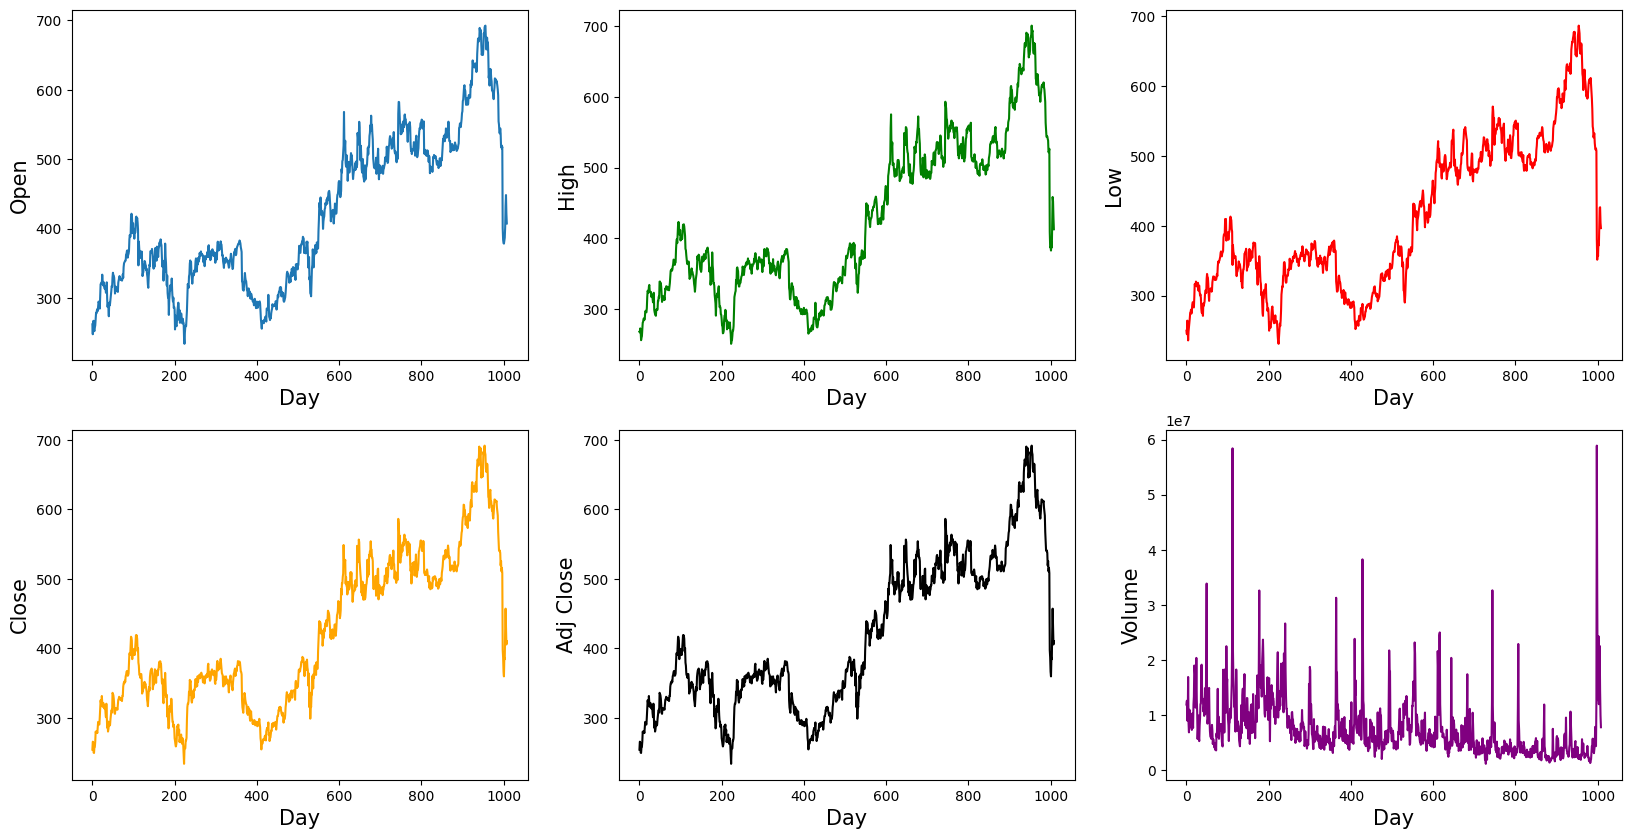

In [8]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

ax1.plot(data['Open'])
ax1.set_xlabel("Day", fontsize=15)
ax1.set_ylabel("Open", fontsize=15)

ax2.plot(data['High'], color='green')
ax2.set_xlabel("Day", fontsize=15)
ax2.set_ylabel("High", fontsize=15)

ax3.plot(data['Low'], color='red')
ax3.set_xlabel("Day", fontsize=15)
ax3.set_ylabel("Low", fontsize=15)

ax4.plot(data['Close'], color='orange')
ax4.set_xlabel("Day", fontsize=15)
ax4.set_ylabel("Close", fontsize=15)

ax5.plot(data['Adj Close'], color='black')
ax5.set_xlabel("Day", fontsize=15)
ax5.set_ylabel("Adj Close", fontsize=15)

ax6.plot(data['Volume'], color='purple')
ax6.set_xlabel("Day", fontsize=15)
ax6.set_ylabel("Volume", fontsize=15)

plt.show()

# Data Preprocessing

In [9]:
print(data.columns)
print(data.shape)
std = StandardScaler()
data.drop([
    'Date'
],axis = 1, inplace = True)
data = std.fit_transform(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
(1009, 7)


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

In [10]:
new_data = pd.DataFrame(data)
new_data.head()

,0,1,2,3,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,-1.566302,1.709045


In [11]:
Y = new_data[3]
X = new_data.drop([3], axis=1)

In [12]:
X.head()

,0,1,2,4,5
0,-1.447772,-1.441465,-1.510141,-1.522047,0.791791
1,-1.579589,-1.452453,-1.556931,-1.416167,0.919875
2,-1.405553,-1.399802,-1.377121,-1.426885,0.258257
3,-1.400944,-1.444029,-1.510420,-1.560481,0.317787
4,-1.522898,-1.552262,-1.639627,-1.566302,1.709045


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
ms = []
ma = []
mse = mean_squared_error
mae = mean_absolute_error

In [17]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    y_pred = np.nan_to_num(model.predict(X_test))
    print(mse(y_test, y_pred))
    print(mae(y_test, y_pred))
    ms.append(mse(y_test, y_pred))
    ma.append(mae(y_test, y_pred))

# 1. Random Forest regressor

In [15]:
model = RandomForestRegressor(n_estimators = 5)
model_training_and_score(model)

0.00031380764391278636
0.008240147741547894


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

# 2. Lasso Regression

In [18]:
model = Lasso(alpha=0.1)
model_training_and_score(model)

0.009532879532814655
0.08661212586285877


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

# 3. Support Vector Regressor

In [19]:
model = SVR()
model_training_and_score(model)

0.007839491113437673
0.04148984740386858


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

# 4. Stochastic Gradient Descent

In [20]:
model = SGDRegressor()
model_training_and_score(model)

0.0015899354904371167
0.02923335464732069


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

# 5. Gaussian Process Regressor

In [21]:
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel,random_state=0)
model_training_and_score(model)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

1.437624317751974e-13
2.6701833510417723e-07


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/

# 6. Decision Tree Regressor

In [22]:
model = DecisionTreeRegressor()
model_training_and_score(model)

0.0003151642955714403
0.006925622216324811


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

# 7. K Neighbors Regressor

In [23]:
model = KNeighborsRegressor()
model_training_and_score(model)

0.004306546868542347
0.037225654710008056


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

# 8. Radius Neighbors Regressor

In [24]:
model = RadiusNeighborsRegressor()
model_training_and_score(model)

0.024360987881300554
0.10095769034569609


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i

# 9. Ridge Regression

In [25]:
model = Ridge(alpha = 1)
model_training_and_score(model)

0.00019107768454208635
0.010210850965397613


/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse i



# Plotting Losses of different models

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (9).

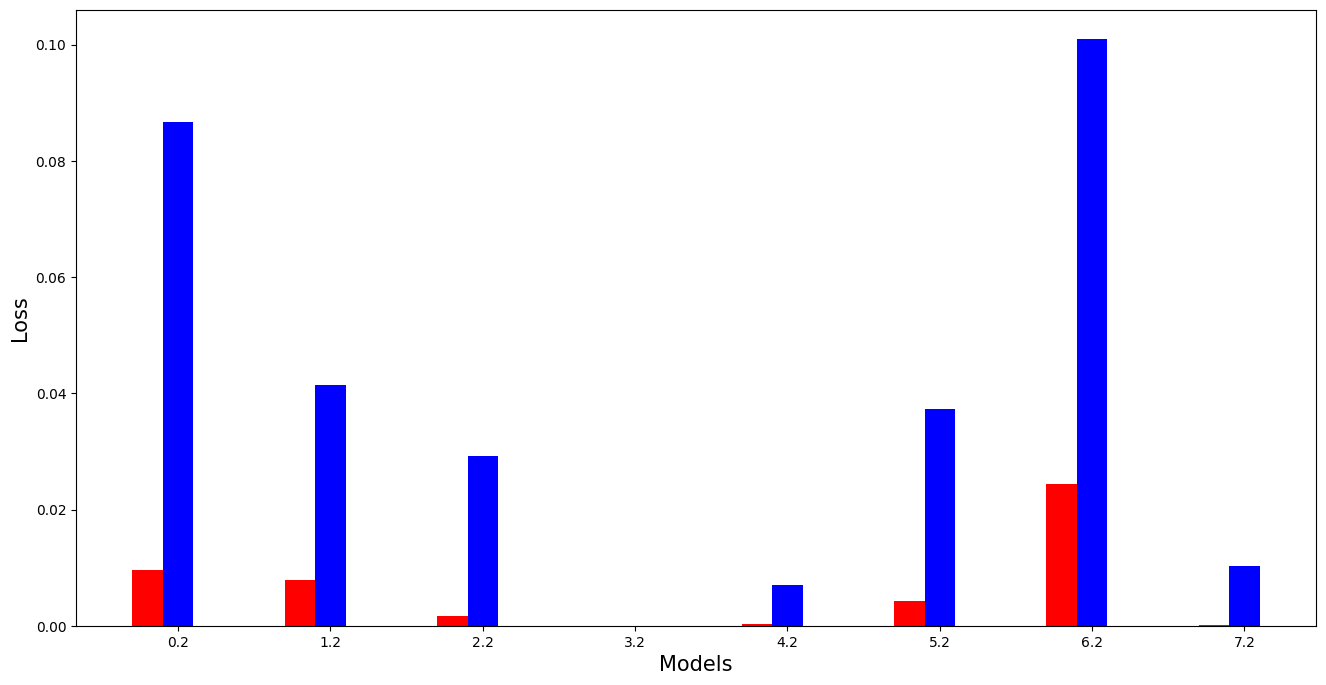

In [27]:
barwidth = 0.2
fig = plt.subplots(figsize =(16, 8))
br1 = np.arange(len(ms))
plt.bar(np.arange(len(ms)), ms, color = 'red', width = barwidth, label='Mean Squared Error')
br2 = [x + barwidth for x in br1]
plt.bar(br2, ma, color='blue', width=barwidth, label='Mean Absolute Error')
plt.xlabel("Models", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
models = ["Random Forest", "Lasso", "Support Vector", "Stochastic Gradient", "Gaussian Process", "Decision Tree", "K Neighbors", "Radius Neighbors","Ridge Regression"]
plt.xticks([r + barwidth for r in range(len(ms))],models)
plt.legend()
plt.show()